# [AMPLab] report: music analysis
## Nightwish - Ghost Love Score
Notebook created by Philip Tovstogan

In [28]:
# Essentia init
import essentia.standard as es
stats = ['mean', 'stdev']
sample_rate = 44100
lowlevel_hop_size = 1024
music_extractor = es.MusicExtractor(lowlevelStats=stats, rhythmStats=stats, tonalStats=stats, 
                                    lowlevelHopSize=lowlevel_hop_size)

In [2]:
features_stats, features_frame = music_extractor('audio.mp3')

In [4]:
es.YamlOutput(format='json', filename='stats.json')(features_stats)
es.YamlOutput(format='json', filename='frames.json')(feature_frame)

In [5]:
features_frame = es.YamlInput(filename='frames.json', format='json')()

In [12]:
sorted(features_frame.descriptorNames())

['lowlevel.average_loudness',
 'lowlevel.barkbands',
 'lowlevel.barkbands_crest',
 'lowlevel.barkbands_flatness_db',
 'lowlevel.barkbands_kurtosis',
 'lowlevel.barkbands_skewness',
 'lowlevel.barkbands_spread',
 'lowlevel.dissonance',
 'lowlevel.dynamic_complexity',
 'lowlevel.erbbands',
 'lowlevel.erbbands_crest',
 'lowlevel.erbbands_flatness_db',
 'lowlevel.erbbands_kurtosis',
 'lowlevel.erbbands_skewness',
 'lowlevel.erbbands_spread',
 'lowlevel.gfcc',
 'lowlevel.hfc',
 'lowlevel.loudness_ebu128.integrated',
 'lowlevel.loudness_ebu128.loudness_range',
 'lowlevel.loudness_ebu128.momentary',
 'lowlevel.loudness_ebu128.short_term',
 'lowlevel.melbands',
 'lowlevel.melbands128',
 'lowlevel.melbands_crest',
 'lowlevel.melbands_flatness_db',
 'lowlevel.melbands_kurtosis',
 'lowlevel.melbands_skewness',
 'lowlevel.melbands_spread',
 'lowlevel.mfcc',
 'lowlevel.pitch_salience',
 'lowlevel.silence_rate_20dB',
 'lowlevel.silence_rate_30dB',
 'lowlevel.silence_rate_60dB',
 'lowlevel.spectral_c

Text(0.5,1,'Spectral complexity')

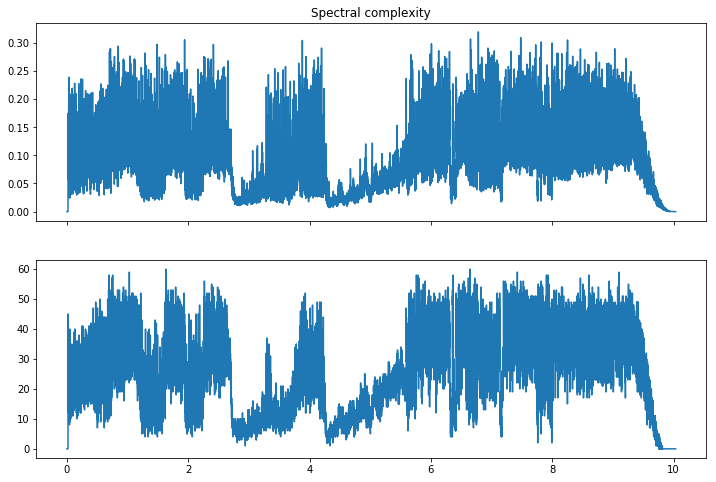

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(2, sharex=True, figsize=[12,8])

x = np.arange(len(features_frame['lowlevel.spectral_flux'])) / sample_rate * lowlevel_hop_size / 60

ax[0].plot(x, features_frame['lowlevel.spectral_flux'])
ax[0].set_title('Spectral flux')

ax[1].plot(x, features_frame['lowlevel.spectral_complexity'])
ax[0].set_title('Spectral complexity')
